In [1]:
# import pandas as pd # TODO: find uses later
import numpy as np

In [2]:
MIN_CUE_WGT, MAX_CUE_WGT = 420, 550  # grams
MIN_BALL_WGT, MAX_BALL_WGT = 205, 220  # grams
MIN_BR_LEN, MAX_BR_LEN = 1, 25  # centimeters
MIN_SPEED, MAX_SPEED = 0.05, 3.5  # m/s, from caromball.com

In [3]:
count_weights = round((MAX_CUE_WGT - MIN_CUE_WGT)/10)
cue_weights = np.linspace(MIN_CUE_WGT, MAX_CUE_WGT, count_weights, dtype=np.int16)

print('cue weights=', str(cue_weights[:2]) + '...' + str(cue_weights[-2:]))

cue weights= [420 430]...[539 550]


In [4]:
proj_vel = np.arange(MIN_SPEED, MAX_SPEED, step=0.1)
print('projected velocities=', str(proj_vel[:2]) + '...' + str(proj_vel[-2:]))

projected velocities= [0.05 0.15]...[3.35 3.45]


In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [6]:
%matplotlib widget

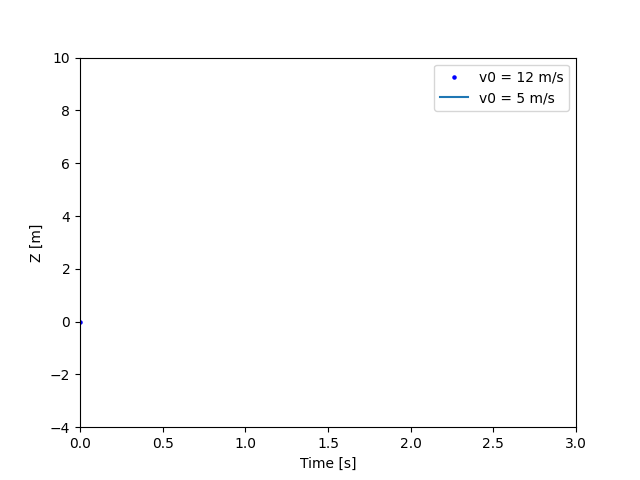

In [7]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()